In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [13]:
#charger les données 
df_fréquentation= pd.read_excel("Fréquentation 2011.xlsx")


#creation des données de la longuer de la ligne 
#liste des années
année_extention= list(range(2011,2025))

#longueur de la ligne 
longueur_ligne= []
for annee in année_extention :
    if annee < 2015 :
        longueur_ligne.append(9.5)
    elif annee < 2018 : 
        longueur_ligne.append(9.5+4)
    else : 
        longueur_ligne.append(9.5+4+5.3)

#nombre de station 
nombre_station = []
for annee in année_extention :
    if annee < 2015 :
        nombre_station.append(10)
    elif annee < 2018 : 
        nombre_station.append(14)
    else : 
        nombre_station.append(19)


#creer un data frame 
df_longueur = pd.DataFrame({"Année": année_extention , "longuer de la ligne" : longueur_ligne, "nombre de stations":nombre_station})


#fusionner avec la frequentation
my_data = pd.merge(df_fréquentation,df_longueur, on="Année", how="left")

my_data= my_data.drop(0)
my_data= my_data.drop(9)
my_data= my_data.drop(10)
my_data=my_data.drop(11)

#my_data["impact_covid"] = np.where(my_data["Année"].isin([2020,2021]),1,0)

print(my_data.head(14))

    Année  Fréquentation       Recette  longuer de la ligne  \
1    2012       11314826  5.627748e+08                  9.5   
2    2013       15112105  6.780916e+08                  9.5   
3    2014       16136151  7.296379e+08                  9.5   
4    2015       21396960  9.433105e+08                 13.5   
5    2016       28590817  1.182272e+09                 13.5   
6    2017       30000512  1.227567e+09                 13.5   
7    2018       40266945  1.670366e+09                 18.8   
8    2019       45342999  1.874965e+09                 18.8   
12   2023       46147883  1.958702e+09                 18.8   
13   2024       49416108  2.097509e+09                 18.8   

    nombre de stations  
1                   10  
2                   10  
3                   10  
4                   14  
5                   14  
6                   14  
7                   19  
8                   19  
12                  19  
13                  19  


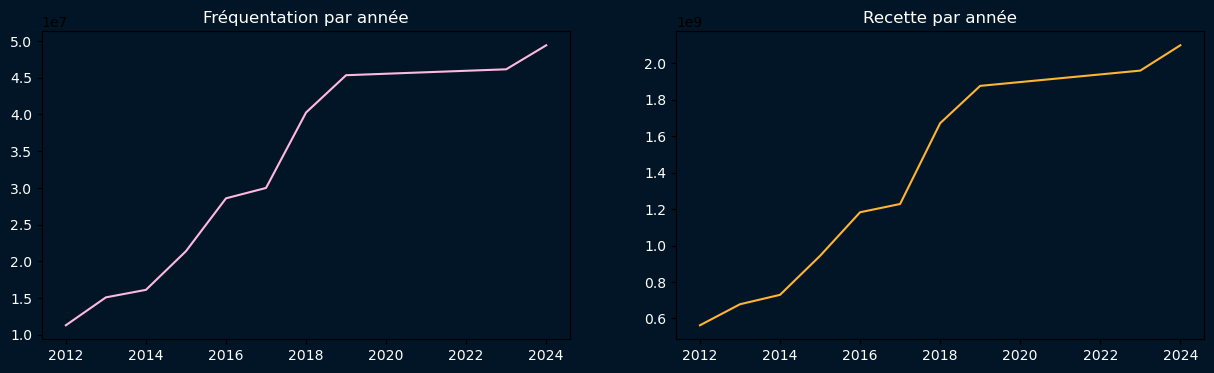

In [14]:
#visualisation 
plt.figure(figsize=(15,4),facecolor="#021526")
plt.subplot(1,2 ,1)
plt.plot(my_data["Année"],my_data["Fréquentation"],color="#FFB8E0")
plt.title("Fréquentation par année",color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")

plt.subplot(1,2,2)
plt.plot(my_data["Année"],my_data["Recette"],color="#FFB433")
plt.title("Recette par année",color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")

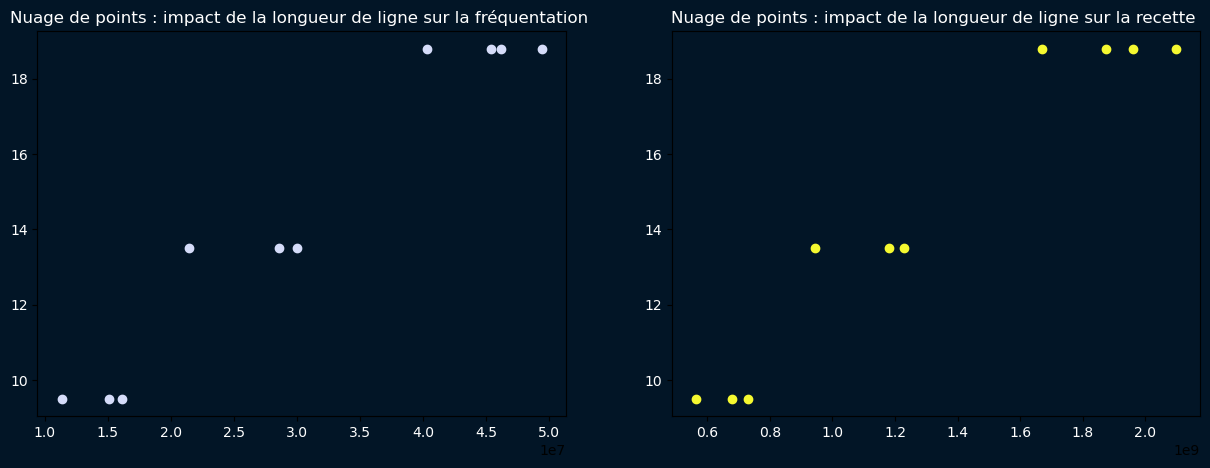

In [34]:
#visualisation des relations
plt.figure(figsize=(15,5),facecolor="#021526")
plt.subplot(1,2,1)
plt.scatter(my_data["Fréquentation"],my_data["longuer de la ligne"],color="#D5DCF9",alpha=1)
plt.title("Nuage de points : impact de la longueur de ligne sur la fréquentation ", color= "white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")

plt.subplot(1,2,2)
plt.scatter(my_data["Recette"],my_data["longuer de la ligne"],color="#F6F930",alpha=1)
plt.title("Nuage de points : impact de la longueur de ligne sur la recette ", color= "white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")

plt.show()


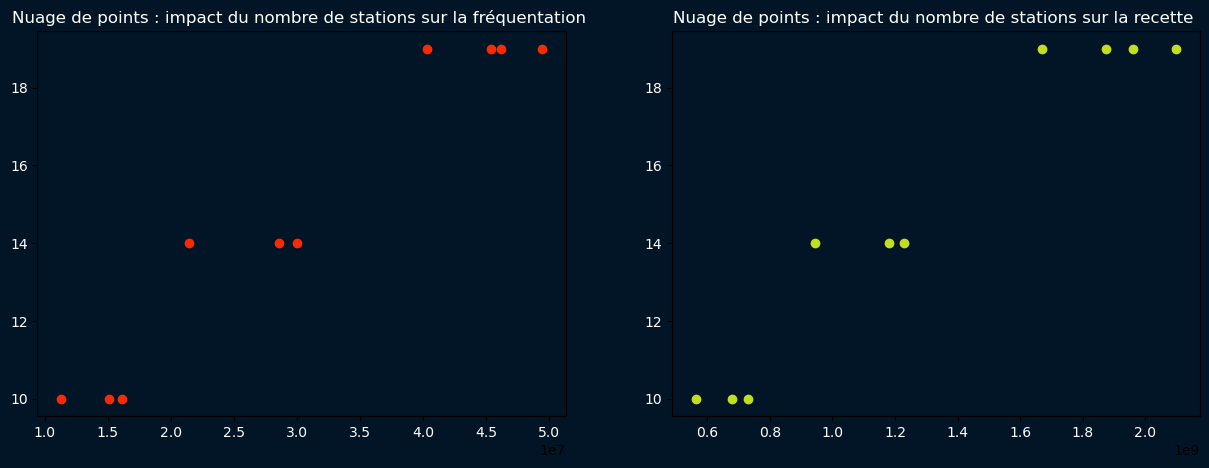

In [37]:
#visualisation des relations
plt.figure(figsize=(15,5),facecolor="#021526")
plt.subplot(1,2,1)
plt.scatter(my_data["Fréquentation"],my_data["nombre de stations"],color="#F42B03",alpha=1)
plt.title("Nuage de points : impact du nombre de stations sur la fréquentation ", color= "white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")

plt.subplot(1,2,2)
plt.scatter(my_data["Recette"],my_data["nombre de stations"],color="#C1DF1F",alpha=1)
plt.title("Nuage de points : impact du nombre de stations sur la recette ", color= "white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")


[None, None, None, None, None, None, None]

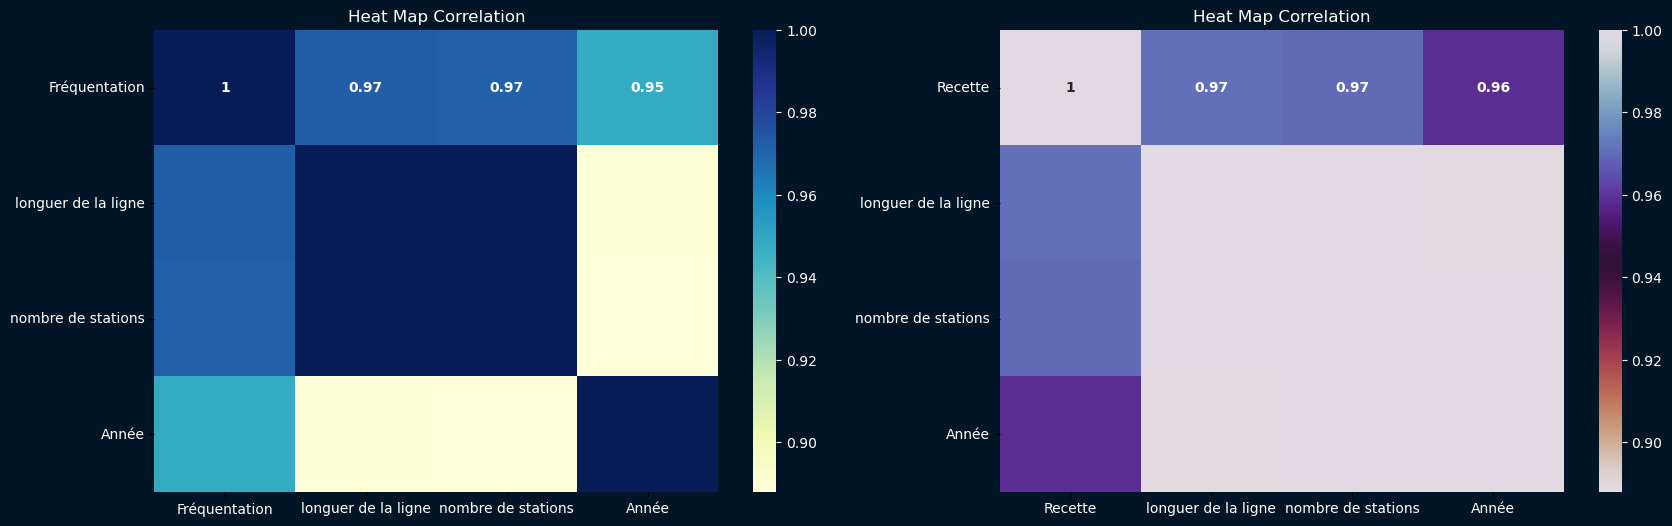

In [56]:
corr_frequentation= my_data[["Fréquentation","longuer de la ligne","nombre de stations","Année"]].corr()
corr_recette= my_data[["Recette","longuer de la ligne","nombre de stations","Année"]].corr()
#print(corr)

plt.figure(figsize=(20,6),facecolor="#021526")
plt.subplot(1,2,1)
ax=sns.heatmap(corr_frequentation,
            annot=True,
            cmap="YlGnBu",
            cbar=True,
            annot_kws={"fontweight" : "bold"})
plt.title("Heat Map Correlation",color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")
# Rendre les labels de la colorbar blancs
cbar = ax.collections[0].colorbar #Cette ligne récupère la colorbar générée automatiquement par Seaborn.
cbar.ax.yaxis.set_tick_params(color='white')  # couleur des ticks
plt.setp(cbar.ax.yaxis.get_ticklabels(), color='white')  # couleur du texte des ticks

plt.subplot(1,2,2)
ax=sns.heatmap(corr_recette,
            annot=True,
            cmap="twilight_r",
            cbar=True,
            annot_kws={"fontweight" : "bold"})
plt.title("Heat Map Correlation",color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")
# Rendre les labels de la colorbar blancs
cbar = ax.collections[0].colorbar #Cette ligne récupère la colorbar générée automatiquement par Seaborn.
cbar.ax.yaxis.set_tick_params(color='white')  # couleur des ticks
plt.setp(cbar.ax.yaxis.get_ticklabels(), color='white')  # couleur du texte des ticks

In [57]:
#signification de la relation 
from scipy.stats import pearsonr

correlation , p_value = pearsonr(my_data["Fréquentation"], my_data["longuer de la ligne"])
print(f"Corrélation de Pearson : {correlation:.3f}, p-value : {p_value:.3f}")

correlation1 , p_value1 = pearsonr(my_data["Fréquentation"], my_data["nombre de stations"])
print(f"Corrélation de Pearson : {correlation1:.3f}, p-value : {p_value1:.3f}")

correlation , p_value = pearsonr(my_data["Recette"], my_data["longuer de la ligne"])
print(f"Corrélation de Pearson : {correlation:.3f}, p-value : {p_value:.3f}")

correlation1 , p_value1 = pearsonr(my_data["Recette"], my_data["nombre de stations"])
print(f"Corrélation de Pearson : {correlation1:.3f}, p-value : {p_value1:.3f}")


Corrélation de Pearson : 0.972, p-value : 0.000
Corrélation de Pearson : 0.971, p-value : 0.000
Corrélation de Pearson : 0.971, p-value : 0.000
Corrélation de Pearson : 0.970, p-value : 0.000


In [59]:
from sklearn.linear_model import LinearRegression #pour créer et entraîner le modèle de régression
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error # pour evaluer le modele


#rendre les variable en 2D 
X= my_data[["Année", "longuer de la ligne","nombre de stations"]]
Y= my_data["Fréquentation"]

model=LinearRegression()
model.fit(X,Y)

print("Intercept :", model.intercept_) #constante 
print("Coefficients :", model.coef_) 

fréquentation_predite = model.predict(X)

R= r2_score(Y,fréquentation_predite)
print(f"R² Score: {R:.4f}")

mae = mean_absolute_error(Y,fréquentation_predite)
rmse = np.sqrt(mean_squared_error(Y,fréquentation_predite))

print(f"MAE : {mae:,.0f}")
print(f"RMSE : {rmse:,.0f}")

Y_recette=my_data["Recette"]
model_recette=LinearRegression()
model_recette.fit(X,Y_recette)

print("Intercept :", model_recette.intercept_) #constante 
print("Coefficients :", model.coef_) 
recette_predite = model_recette.predict(X)

r=r2_score(Y_recette,recette_predite)
print(f"R² Score: {r:.4f}")
mae_recette= mean_absolute_error(Y_recette,recette_predite)
rmse_recette=np.sqrt(mean_squared_error(Y_recette,recette_predite))

print(f"MAE : {mae_recette:,.0f}")
print(f"RMSE : {rmse_recette:,.0f}")


Intercept : -2854819310.42778
Coefficients : [ 1416071.13333333  4222651.94444445 -2165938.04444445]
R² Score: 0.9789
MAE : 1,637,637
RMSE : 1,957,751
Intercept : -127299569561.68379
Coefficients : [ 1416071.13333333  4222651.94444445 -2165938.04444445]
R² Score: 0.9875
MAE : 50,033,389
RMSE : 60,604,414


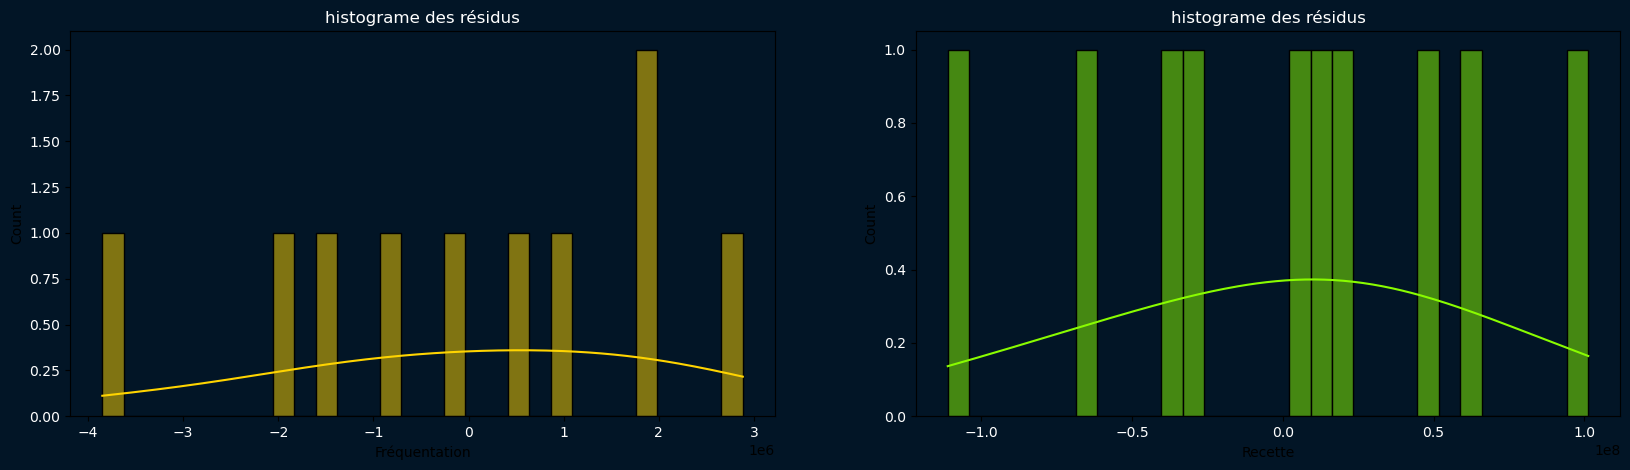

In [83]:
residuals = Y-fréquentation_predite
residuals_recette=Y_recette-recette_predite

plt.figure(figsize=(20,5),facecolor="#021526")
plt.subplot(1,2,1)
sns.histplot(residuals, bins=30, kde=True,color="#FFD400")  #kde = courb ed densité
plt.title("histograme des résidus",color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")

plt.subplot(1,2,2)
sns.histplot(residuals_recette, bins=30, kde=True,color="#89FC00")  #kde = courb ed densité
plt.title("histograme des résidus",color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#021526")





In [62]:
from scipy.stats import shapiro
stat, p_value = shapiro(residuals)
print(f"Shapiro-Wilk test: p-value = {p_value}")

stat, p_value = shapiro(residuals_recette)
print(f"Shapiro-Wilk test: p-value = {p_value}")

Shapiro-Wilk test: p-value = 0.9161688089370728
Shapiro-Wilk test: p-value = 0.9949177503585815


In [71]:
donnée_2027= pd.DataFrame({
    "Année" : [2025,2026,2027],
    "longuer de la ligne" : [18.8,18.8,18.8+17],
    "nombre de stations" : [19,19,19+15]
})

fréquentation_predite_2027 = model.predict(donnée_2027)
print(fréquentation_predite_2027)
recette_predite_2027=model_recette.predict(donnée_2027)
print(recette_predite_2027)

donnée_2027["fréquentation predite"]= fréquentation_predite_2027.astype(int)
donnée_2027["Recette predite"]= recette_predite_2027
print(donnée_2027)


[50957768.2833333  52373839.41666651 93085922.93888855]
[2.15372193e+09 2.21705603e+09 4.14551724e+09]
   Année  longuer de la ligne  nombre de stations  fréquentation predite  \
0   2025                 18.8                  19               50957768   
1   2026                 18.8                  19               52373839   
2   2027                 35.8                  34               93085922   

   Recette predite  
0     2.153722e+09  
1     2.217056e+09  
2     4.145517e+09  
